In [1]:
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import docx
from slugify import slugify
import pickle

In [2]:
files = {
    '2017_1_doc' : glob("docs/originals/2017.1/*.doc"),
    '2017_1_docx' : glob("docs/originals/2017.1/*.docx"),
    '2017_1_odt' : glob("docs/originals/2017.1/*.odt"),
    '2017_1_pdf' : glob("docs/originals/2017.1/*.pdf"),
    '2017_1_rtf' : glob("docs/originals/2017.1/*.rtf"),
    '2017_2_doc' : glob("docs/originals/2017.2/*.doc"),
    '2017_2_docx' : glob("docs/originals/2017.2/*.docx"),
    '2017_2_odt' : glob("docs/originals/2017.2/*.odt"),
    '2017_2_pdf' : glob("docs/originals/2017.2/*.pdf"),
    '2017_2_rtf' : glob("docs/originals/2017.2/*.rtf"),
    '2018_1_doc' : glob("docs/originals/2018.1/*.doc"),
    '2018_1_docx' : glob("docs/originals/2018.1/*.docx"),
    '2018_1_odt' : glob("docs/originals/2018.1/*.odt"),
    '2018_1_pdf' : glob("docs/originals/2018.1/*.pdf"),
    '2018_1_rtf' : glob("docs/originals/2018.1/*.rtf"),    
}



In [41]:
name=[]
count_files = []
for x in sorted(files):
    name.append(x)
    count_files.append(len(files[x]))
    #print(x, len(files[x]),"\n")
    

In [4]:
'''
plt.bar(name,count_files,color=['red', 'green', 'blue', 'cyan', 'magenta'])
plt.xticks(rotation='vertical')

plt.show()
'''

"\nplt.bar(name,count_files,color=['red', 'green', 'blue', 'cyan', 'magenta'])\nplt.xticks(rotation='vertical')\n\nplt.show()\n"

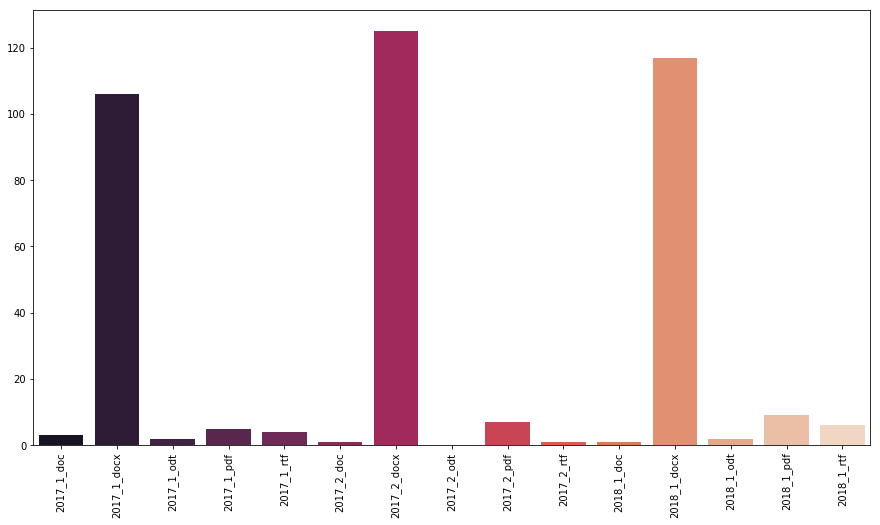

In [5]:
plt.figure(figsize=(15,8))
fig = sns.barplot(name,count_files,palette='rocket');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [28]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    text = slugify('\n'.join(fullText),lowercase=False, separator=" ")
    return text[100:len(text)]

In [32]:
def getLabel(title):
    regex_pattern = r'[^0-9]+'
    label = slugify(title ,max_length=13,regex_pattern=regex_pattern)
    return label

    

In [44]:
label_content = {}
for i in range(0,len(files['2018_1_docx'])):
    title = getLabel(files['2018_1_docx'][i])
    text = getText(files['2018_1_docx'][i])
    label_content[title] = text

In [46]:
with open('label_content_2018_1', 'wb') as f:
    pickle.dump(label_content, f)